In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

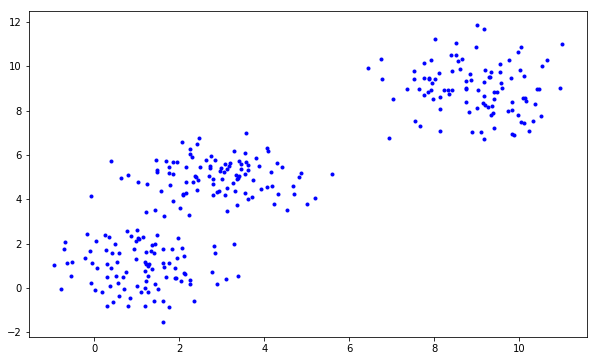

In [2]:
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100) # 중심, 공분산, 크기
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

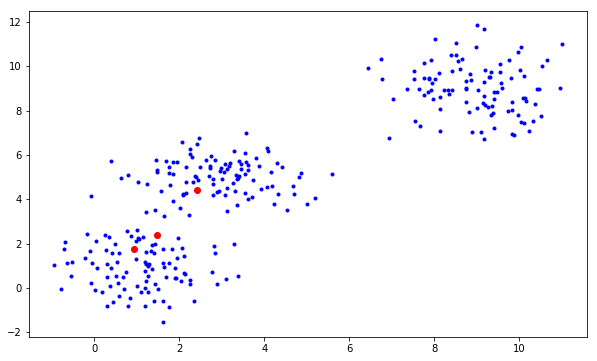

In [3]:
# The number of clusters and  data
k = 3
m = X.shape[0]

# randomly initailize mean points
mu = X[np.random.randint(0,300,k),:] # X 에서 랜덤으로 3개 고른 거 
pre_mu = mu.copy()

plt.figure(figsize=(10,6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.plot(mu[:,0], mu[:,1], 'ro')
plt.show()

In [4]:
y = np.empty([m,1])

# Run K-means
for n_iter in range(500):
    for i in range(m):
        d0 = np.linalg.norm(X[i,:] - mu[0,:],2)
        d1 = np.linalg.norm(X[i,:] - mu[1,:],2)
        d2 = np.linalg.norm(X[i,:] - mu[2,:],2)
        
        y[i] = np.argmin([d0, d1, d2])   #mu0, mu1, mu2 중에 가장 가까운 곳 
       
    err = 0
    for i in range(k):
        mu[i,:] = np.mean(X[np.where(y == i)[0]], axis=0) # mui에 가까운 성분들의 평균 
        err += np.linalg.norm(pre_mu[i,:] - mu[i,:], 2)
    
    pre_mu = mu.copy()
    
    # 수렵값 정함.
    if err < 1e-10 : 
        print("Iteration:", n_iter)
        break

Iteration: 4


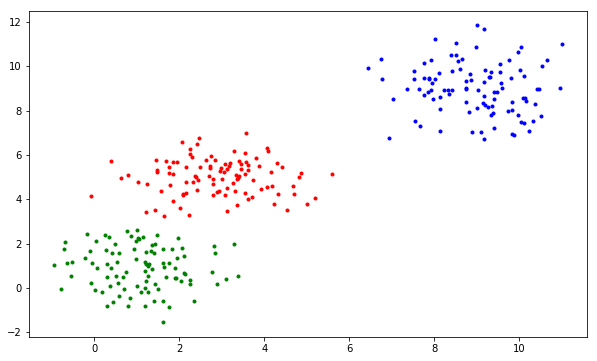

In [5]:
X0 = X[np.where(y == 0)[0]]
X1 = X[np.where(y == 1)[0]]
X2 = X[np.where(y == 2)[0]]

plt.figure(figsize=(10, 6))
plt.plot(X0[:,0], X0[:,1], 'b.')
plt.plot(X1[:,0], X1[:,1], 'g.')
plt.plot(X2[:,0], X2[:,1], 'r.')
plt.show()

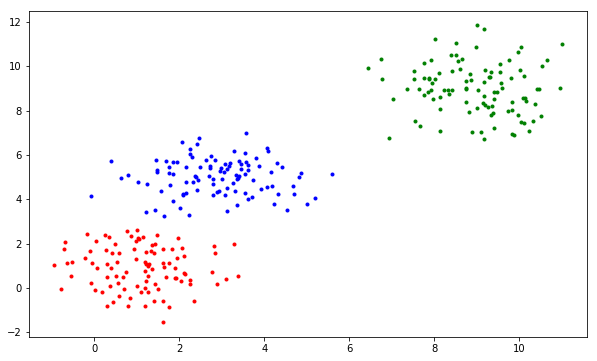

In [6]:
# use k-means from scikit-learn module

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)

plt.figure(figsize=(10, 6))
plt.plot(X[kmeans.labels_ == 0,0], X[kmeans.labels_ == 0,1], 'b.')
plt.plot(X[kmeans.labels_ == 1,0], X[kmeans.labels_ == 1,1], 'g.')
plt.plot(X[kmeans.labels_ == 2,0], X[kmeans.labels_ == 2,1], 'r.')
plt.show()

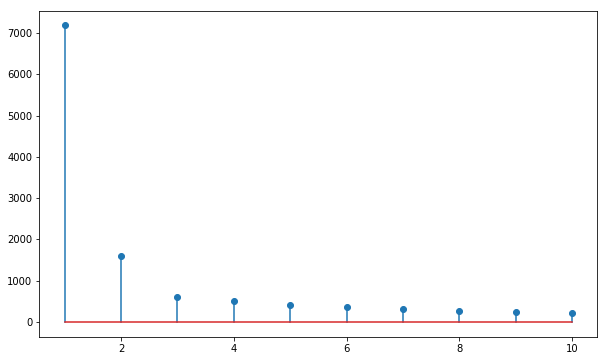

In [7]:
cost = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    cost.append(abs(kmeans.score(X)))
    
plt.figure(figsize=(10,6))
plt.stem(range(1,11),cost)
plt.show()

# elbow point -> 3 